# Fuerzas de ligadura | Péndulo rígido ideal
© 2020 Víctor A. Bettachini  
Mecánica General  
Departamento de Ingeniería e Investigación Tecnológica  
Universidad Nacional de La Matanza   
![](ambos.png "UNLaM | DIIT")  

---

# Enunciado 
Calcule la tensión de la cuerda con el método de multiplicadores de Lagrange.
La restricción es que la pesa se mantiene siempre en \\(\vec{r} = l \hat{\rho}\\), ergo la función que expresa esto es \\(f(\rho) = \rho - l = 0\\).

![](marion_fig7_1.png)

## Resolución

In [1]:
# módulo de cálculo simbólico
import sympy as sym
import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con puntos para derivadas temporales

### Variables

In [2]:
# Defino los parámetros físicos del sistema
m, g, l = sym.symbols('m, g, l', positive=True)

# Defino coordenadas generalizadas 
t = sym.symbols('t') # tiempo
rho = sym.Function('rho')(t)
theta = sym.Function('theta')(t)

### Ligaduras

In [3]:
f1 = rho - l
lambda1 = sym.symbols('lambda_1') # Tantos lambda como funciones de ligadura

f1_simbolo = sym.Function('f_1')(rho)
f1_eq = sym.Eq(f1_simbolo, f1)
f1_eq

### Energía cinética

In [4]:
# Sistema cartesiano
N = sym.physics.vector.ReferenceFrame('N') # marco referencial N en coordenadas cartesianas

# posiciones
m_r = rho* (sym.cos(theta)* (-N.y) + sym.sin(theta)* (N.x)) # recordemos que tomamos y hacia arriba

# velocidades
m_v = m_r.diff(t,N) # derivada respecto a t en el marco referencial N

In [5]:
# velocidades al cuadrado es decir producto punto con si mismo
m_v_cuadrado = m_v.dot(m_v)

In [6]:
unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
m_T = unMedio* m* m_v_cuadrado
T = m_T
cineticaSimbolo = sym.Symbol('T')
sym.Eq(cineticaSimbolo, T.simplify() ) # simplify: simplifica usando factor común y otras operaciones

### Energía potencial

Como vimos, estableciendo la usual $V(y_0=0)=0$ nos queda
$$
V_i= m_i g y_i.
$$

Solo nos ocupa tener la componente en $\hat{y}$ de la pesa de $m_2$.
Esto se obtiene de multiplicar (producto punto) su posición $\vec{r}_2$ con el versor $\hat{y}$.

In [7]:
m_y = m_r.dot(N.y)

In [8]:
# Energía potencial
m_V = m* g* (m_y)
V = m_V
potencialSimbolo = sym.Symbol('V')
sym.Eq(potencialSimbolo, V.simplify() )

### Lagrangiano

In [9]:
lagrangianoSimbolo = sym.Symbol('\mathcal{L}')
L = T-V
sym.Eq(lagrangianoSimbolo, L.simplify())

### Ecuaciones de Euler-Lagrange

Las fuerzas generalizadas causadas por un potencial:

$$
\frac{\partial}{\partial q_i} \mathcal{L} .
$$

In [10]:
theta_dq = L.diff(theta)
rho_dq = L.diff(rho)

El simíl masa por aceleración, la derivada en el tiempo de los $p_i$:

$$
\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L} .
$$

In [11]:
theta_dtdp = L.diff(theta.diff(t)).diff(t)
rho_dtdp = L.diff(rho.diff(t)).diff(t)

Las fuerzas generalizadas de ligadura:

$$
Q_i = \sum_j \lambda_j(t) \frac{\partial}{\partial q_i} f_j .
$$

In [12]:
theta_Q = lambda1* f1.diff(theta)
rho_Q = lambda1* f1.diff(rho)

Con lo anterior pueden escribirse las ecuaciones de Euler-Lagrange:

$$
\frac{\partial}{\partial q_i} \mathcal{L} - \frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L} - \sum_j \lambda_j(t) \frac{\partial}{\partial q_i} f_j = 0 .
$$

In [13]:
theta_EL = sym.Eq(theta_dq - theta_dtdp - theta_Q, 0) # ecuación igualando a cero
theta_EL.simplify()

In [14]:
rho_EL = sym.Eq(rho_dq - rho_dtdp - rho_Q, 0) # ecuación igualando a cero
rho_EL.simplify()

### Aplicación de la función de ligadura

Debe aplicarse ahora la función de restricción de la ligadura.
No solo hay que substituir en las ecuaciones de Euler-Lagrange el que

In [15]:
rho_f1 = sym.solve(f1, rho)[0]
sym.Eq(rho, rho_f1)

También se puede establere que la derivada primera y segunda con el tiempo de la función de restricción de la ligadura:

In [16]:
sym.Eq(f1.diff(t), 0)

In [17]:
sym.Eq(f1.diff(t,2), 0)

Se substituyen tales valores en la ecuaciones de Euler-Lagrange.

In [18]:
f1_subs = {
    rho : rho_f1,
    rho.diff(t): rho_f1.diff(t),
    rho.diff(t): rho_f1.diff(t,2)
}

In [19]:
theta_EL_subs = theta_EL.subs(f1_subs).simplify()
theta_EL_subs

In [20]:
rho_EL_subs = rho_EL.subs(f1_subs).simplify()
rho_EL_subs

De la primera se obtiene la ecuación de la dinámica para $\theta$:

In [21]:
theta_pp = sym.solve(theta_EL_subs, theta.diff(t,2) )[0]
sym.Eq(theta.diff(t,2), theta_pp)

De la segunda se obtiene una función para $\lambda_1$

In [22]:
lambda1_funcion = sym.solve(rho_EL_subs, lambda1 )[0]
sym.Eq(lambda1, lambda1_funcion)

Como en este caso

$$
Q_\rho= \lambda_1(t) \frac{\partial}{\partial q_\rho} f_1 = \lambda_1(t),
$$
la expresión para la fuerza de ligadura que realiza la cuerda del péndulo, su tensión, es:

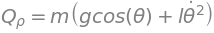

In [23]:
rho_Q_simbolo = sym.Symbol('Q_rho')
sym.Eq(rho_Q_simbolo, lambda1_funcion)